In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import io
import random
import string
import warnings
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings('ignore')

In [3]:
import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *

In [4]:
# sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [5]:
# python imports
import re
import json
from collections import Counter

In [6]:
# Visualization
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from wordcloud import WordCloud
from tqdm import tqdm_notebook

In [7]:
# Saving models
import pickle

In [8]:
import os
os.chdir('/content/drive/MyDrive/DIGI405 /corpus/AT_20_22')

In [9]:
os.getcwd()

'/content/drive/MyDrive/DIGI405 /corpus/AT_20_22'

In [10]:


# # Set the directory containing your text files
# directory = '/content/drive/MyDrive/DIGI405 /corpus/AT_20_22/'

# # Create an empty list to store the content of each file
# all_texts = []

# # Loop through every file in the directory
# for filename in os.listdir(directory):
#     if filename.endswith('.txt'):  # Check if the file is a text file
#         filepath = os.path.join(directory, filename)
#         with open(filepath, 'r', encoding='utf-8') as file:
#             all_texts.append(file.read())  # Add the content of the file to the list

# # Combine all texts into a single string
# combined_text = '\n'.join(all_texts)

# # Path for the new file
# new_file_path = '/content/drive/MyDrive/DIGI405 /corpus/AT_18_20/combined_file.txt'

# # Write the combined text to a new file
# with open(new_file_path, 'w', encoding='utf-8') as file:
#     file.write(combined_text)

# print("All files have been combined into one.")


In [11]:
import nltk
from nltk.text import Text
from nltk.tokenize import word_tokenize

# Make sure to download the required NLTK resources first
nltk.download('punkt')

# Load your text data
with open("/content/drive/MyDrive/DIGI405 /corpus/AT_20_22/combined_file_22.txt", "r", encoding="utf-8") as file:
    text_data = file.read()

# Tokenize the text data
tokens = word_tokenize(text_data)
text_obj = Text(tokens)

# Find and print concordance for "tourism" and "tourist"
print("Concordance for 'tourism':")
text_obj.concordance("tourism", lines=25)

print("\nConcordance for 'tourist':")
text_obj.concordance("tourist", lines=25)


print("\nConcordance for 'australia':")
text_obj.concordance("australian", lines=25)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Concordance for 'tourism':
Displaying 25 of 1156 matches:
 Zealand ports . Although the wider tourism industry has been throttled by trav
s a good news story for New Zealand tourism right now , ’ ’ she said . ‘ ‘ We c
 said . — BusinessDesk VIRUS LEAVES TOURISM INDUSTRY STRUGGLING Fiordland touri
URISM INDUSTRY STRUGGLING Fiordland tourism operators are keenly waiting for th
ick and fast , '' Norris said . The tourism industry would be hitting hard time
land manager Madeleine Peacock said tourism numbers were well down , `` if not 
'' might be a boost in the domestic tourism market , given the travel restricti
he said . `` Some businesses in the tourism sector who have been directly affec
ay would provide wage subsidies for tourism , fishing and forestry . He had nev
in restarting international inbound tourism . “ The tourism industry needs a re
ternational inbound tourism . “ The tourism industry needs a resilient outbound
s , which had rocked the travel and tourism sector . A Book Me

In [12]:
# import string
# from nltk.tokenize import WordPunctTokenizer


# # Convert text_data to lowercase
# text_data_lower = text_data.lower()

# # Remove punctuation from the lowercase text
# translator = str.maketrans('', '', string.punctuation + "’\“\”")
# text_data_no_punct = text_data_lower.translate(translator)

# # Tokenize the text without punctuation into words
# tokens = WordPunctTokenizer().tokenize(text_data_no_punct)

# # Print the tokens
# print(tokens)


In [13]:
# #remove stopwords
# stop_words = set(stopwords.words('english'))
# stop_words.update(['#coronavirus', '#coronavirusoutbreak', '#coronavirusPandemic', '#covid19', '#covid_19', '#epitwitter', '#ihavecorona', 'amp'])
# nltk.download('stopwords')
# stop_words = set(stopwords.words('english'))

# tokens = [token for token in tokens if token not in stop_words]

In [14]:
# from nltk import word_tokenize
# from nltk.tokenize import WordPunctTokenizer
# from nltk.collocations import BigramCollocationFinder
# from nltk.metrics import BigramAssocMeasures
# from nltk.corpus import stopwords
# nltk.download('punkt')
# nltk.download('stopwords')


# # Create a Bigram Collocation Finder instance
# finder = BigramCollocationFinder.from_words(tokens)

# # Filter out bigrams with stopwords or that occur less frequently
# stop_words = set(stopwords.words('english'))
# filter_stops = lambda w: len(w) < 3 or w in stop_words
# finder.apply_word_filter(filter_stops)

# # Find the top 5 bigrams using different association measures
# bigrams_pmi = finder.nbest(BigramAssocMeasures.pmi, 5)  # Pointwise Mutual Information
# bigrams_likelihood = finder.nbest(BigramAssocMeasures.likelihood_ratio, 5)  # Likelihood Ratio

# print("Top 5 Bigrams by PMI:", bigrams_pmi)
# print("Top 5 Bigrams by Likelihood Ratio:", bigrams_likelihood)


In [15]:
# import nltk
# from nltk.collocations import BigramCollocationFinder
# from nltk.collocations import BigramAssocMeasures


# # Filter out stopwords to focus on more meaningful bigrams
# stop_words = set(stopwords.words('english'))

# tokens = [token for token in tokens if token not in stop_words]

# # Create a Bigram Collocation Finder instance
# finder = BigramCollocationFinder.from_words(tokens)

# # Choose a measure of association for ranking bigrams
# bigram_measures = BigramAssocMeasures()

# # Find the top 5 bigrams by their association scores using Pointwise Mutual Information (PMI)
# top_five_bigrams = finder.nbest(bigram_measures.pmi, 5)

# # Optionally, you can also apply frequency filters
# finder.apply_freq_filter(2)  # for example, only bigrams that appear at least 2 times

# # Print the results
# print("Top 5 Bigrams by PMI:", top_five_bigrams)





In [18]:
!pip install nltk
from nltk.tokenize import RegexpTokenizer
nltk.download('stopwords')

from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [19]:
def preprocess_data(doc_set, extra_stopwords={}):
    # adapted from https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

    # replace all newlines or multiple sequences of spaces with a standard space
    doc_set = [re.sub(r'\s+', ' ', doc_set)]

    # initialize regex tokenizer
    tokenizer = RegexpTokenizer(r'\w+')

    # create English stop words list
    en_stop = set(stopwords.words('english'))

    # add any extra stopwords
    if (len(extra_stopwords) > 0):
        en_stop = en_stop.union(extra_stopwords)

    # list for tokenized documents in loop
    texts = []
    # loop through document list
    for i in doc_set:
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]
        # add tokens to list
        texts.append(stopped_tokens)

    return texts

In [20]:
doc_clean = preprocess_data(text_data, {})

In [21]:
flattened_doc = [word for sublist in doc_clean for word in sublist]

In [22]:
#term frequency
sns.set(style="darkgrid")
counts = Counter(flattened_doc).most_common(50)
counts_df = pd.DataFrame(counts)
counts_df.head(10)

,0,1
0,said,1466
1,tourism,1170
2,new,952
3,zealand,626
4,travel,602
5,would,584
6,industry,516
7,covid,506
8,year,468
9,per,448


In [23]:
counts_df.columns = ['word', 'frequency']

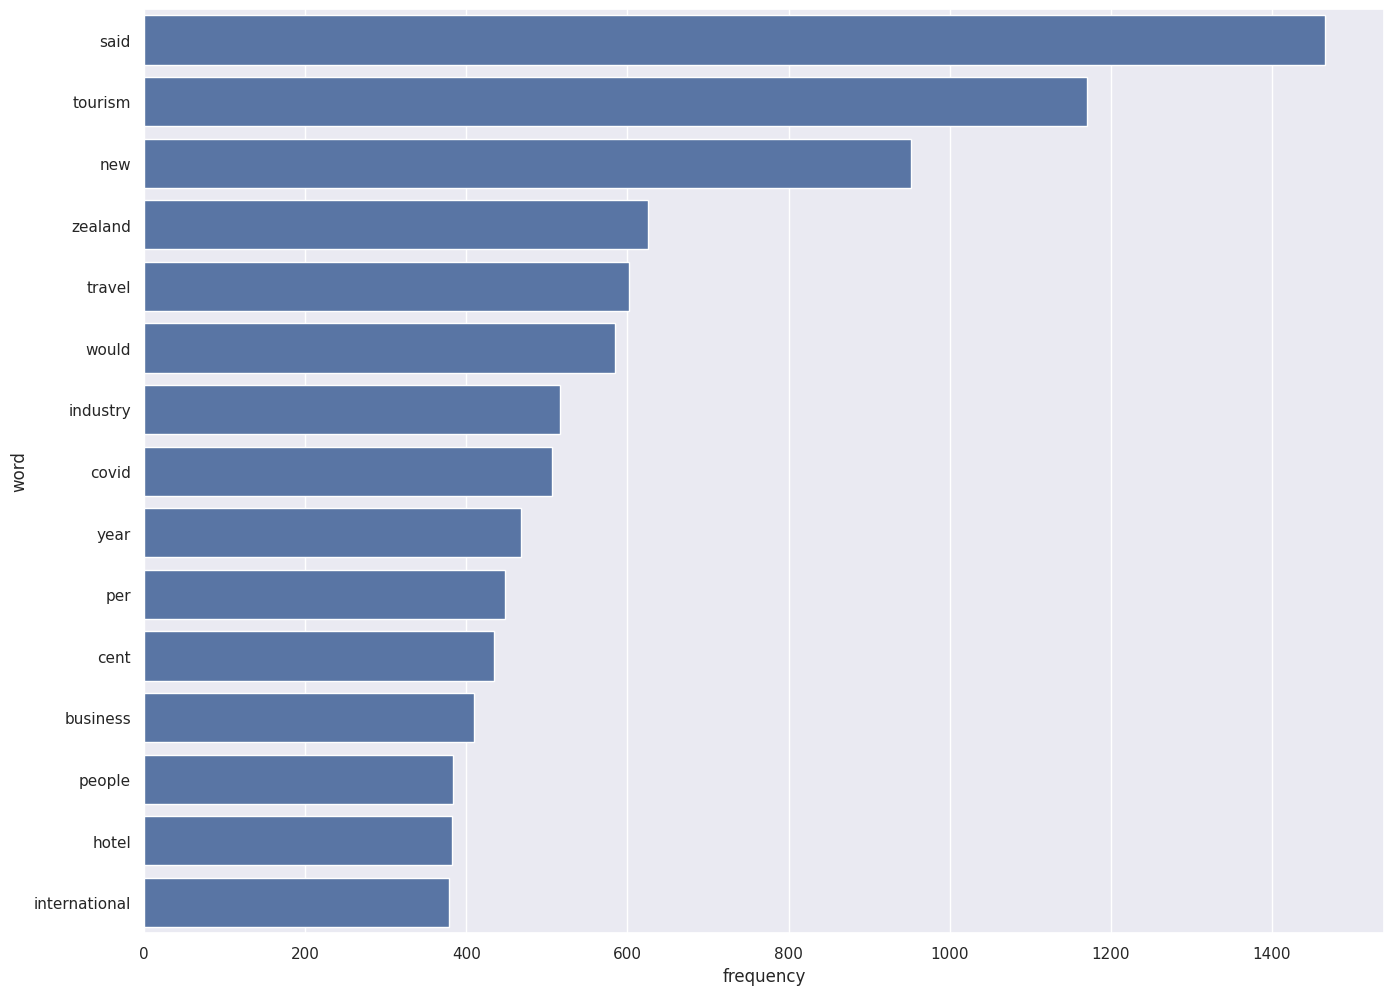

In [24]:
fig, ax = plt.subplots(figsize = (16, 12))
ax = sns.barplot(y="word", x='frequency', ax = ax, data=counts_df[:15])
plt.savefig('wordcount_bar.png')

In [25]:
wordcloud = WordCloud(
    background_color='black',
    max_words=50,
    max_font_size=40,
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(tokens))

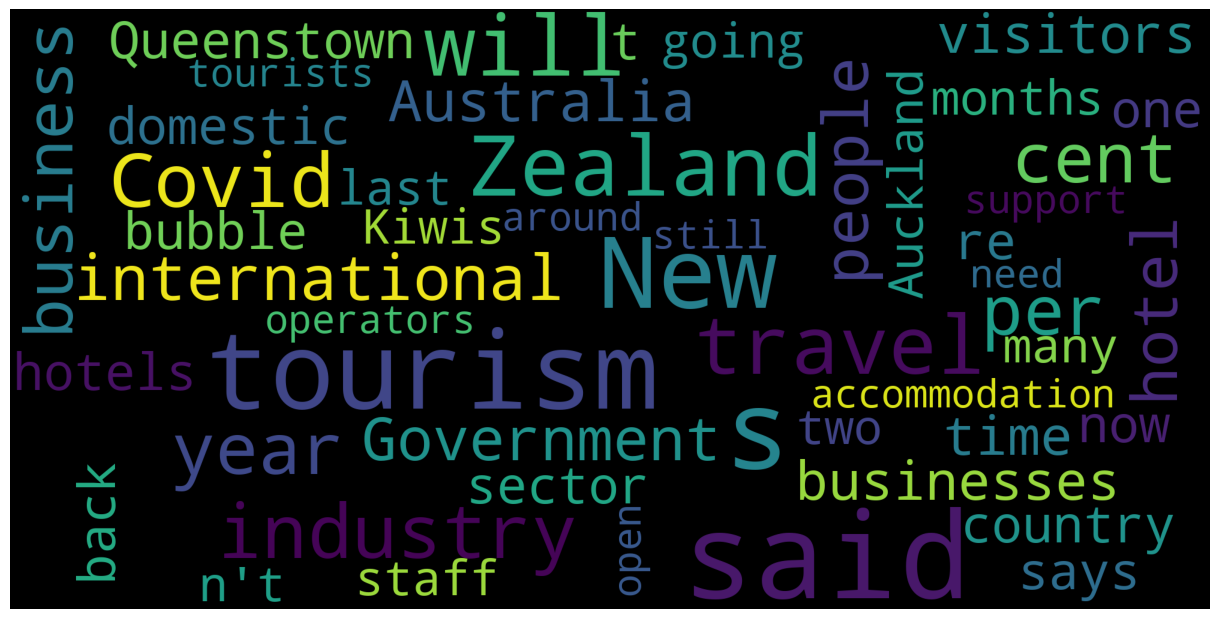

In [26]:
plt.figure(figsize = (12, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.savefig('wordcloud.png')

In [ ]:
import nltk
nltk.download('vader_lexicon')

In [ ]:
#sentimental analysis
sid = SentimentIntensityAnalyzer()
tokens_series = pd.Series(tokens)
sentiment_scores = tokens_series.apply(lambda x: sid.polarity_scores(x))
sent_scores_df = pd.DataFrame(list(sentiment_scores))
sent_scores_df.head()

In [ ]:
#classifying into neu/pos/neg
sent_scores_df['val'] = sent_scores_df['compound'].apply(lambda x: 'neutral' if x == 0 else ('positive' if x > 0 else 'negative'))
sent_scores_df.head()

In [ ]:
#plotting
sent_counts = pd.DataFrame.from_dict(Counter(sent_scores_df['val']), orient = 'index').reset_index()
sent_counts.columns = ['sentiment', 'count']

sns.barplot(y="count", x='sentiment', data=sent_counts)
plt.savefig('sentiment.png')

In [ ]:
polar_tweets_df = pd.DataFrame()
polar_tweets_df['content'] = tokens
polar_tweets_df['polarity'] = sent_scores_df['val']

positive = polar_tweets_df[polar_tweets_df['polarity'] == 'positive']['content']
negative = polar_tweets_df[polar_tweets_df['polarity'] == 'negative']['content']
neutral = polar_tweets_df[polar_tweets_df['polarity'] == 'neutral']['content']

positive_list = [word for line in positive for word in line.split()]
negative_list = [word for line in negative for word in line.split()]
neutral_list = [word for line in neutral for word in line.split()]

positive_cloud = WordCloud(
    background_color='black',
    max_words=50,
    max_font_size=40,
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(positive_list))

negative_cloud = WordCloud(
    background_color='black',
    max_words=50,
    max_font_size=40,
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(negative_list))

neutral_cloud = WordCloud(
    background_color='black',
    max_words=50,
    max_font_size=40,
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(neutral_list))

fig, axs = plt.subplots(2, 2, figsize = (20, 12))
# fig.suptitle('Clouds of polar words', fontsize = 30)
fig.tight_layout(pad = 0)

axs[0, 0].imshow(positive_cloud)
axs[0, 0].set_title('Words from positive content', fontsize = 20)
axs[0, 0].axis('off')
# axs[0, 0].tight_layout(pad = 1)

axs[0, 1].imshow(negative_cloud)
axs[0, 1].set_title('Words from negative content', fontsize = 20)
axs[0, 1].axis('off')
# axs[0, 1].tight_layout(pad = 1)

axs[1, 0].imshow(neutral_cloud)
axs[1, 0].set_title('Words from neutral content', fontsize = 20)
axs[1, 0].axis('off')
# axs[1, 0].tight_layout(pad = 1)

axs[1, 1].imshow(wordcloud)
axs[1, 1].set_title('Words from all content', fontsize = 20)
axs[1, 1].axis('off')
# axs[1, 0].tight_layout(pad = 1)
plt.savefig('joint_cloud.png')
